### IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import pickle
import gradio as gr
import os
import warnings
warnings.filterwarnings("ignore")

### LOAD DATASET

In [4]:
df=pd.read_csv(r'D:\Learning and carreer\project\cybersecurity\cybersecurity.csv')
df

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9532,SID_09533,194,ICMP,3,226.049889,AES,0.517737,3,Chrome,0,1
9533,SID_09534,380,TCP,3,182.848475,NaN,0.408485,0,Chrome,0,0
9534,SID_09535,664,TCP,5,35.170248,AES,0.359200,1,Firefox,0,0
9535,SID_09536,406,TCP,4,86.664703,AES,0.537417,1,Chrome,1,0


## EDA 

In [7]:
df.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


In [9]:
df.tail()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
9532,SID_09533,194,ICMP,3,226.049889,AES,0.517737,3,Chrome,0,1
9533,SID_09534,380,TCP,3,182.848475,NaN,0.408485,0,Chrome,0,0
9534,SID_09535,664,TCP,5,35.170248,AES,0.359200,1,Firefox,0,0
9535,SID_09536,406,TCP,4,86.664703,AES,0.537417,1,Chrome,1,0
9536,SID_09537,340,TCP,6,86.876744,NaN,0.277069,4,Chrome,1,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


In [13]:
df.describe()

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected
count,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000
mean,500.430639,4.032086,792.745312,0.331338,1.517773,0.149942,0.447101
std,198.379364,1.963012,786.560144,0.177175,1.033988,0.357034,0.497220
min,64.000000,1.000000,0.500000,0.002497,0.000000,0.000000,0.000000
25%,365.000000,3.000000,231.953006,0.191946,1.000000,0.000000,0.000000
50%,499.000000,4.000000,556.277457,0.314778,1.000000,0.000000,0.000000
75%,635.000000,5.000000,1105.380602,0.453388,2.000000,0.000000,1.000000
max,1285.000000,13.000000,7190.392213,0.924299,5.000000,1.000000,1.000000


In [15]:
df.isnull().sum()

session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64

In [17]:
df['encryption_used']=df['encryption_used'].fillna(df['encryption_used'].mode()[0])
df

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9532,SID_09533,194,ICMP,3,226.049889,AES,0.517737,3,Chrome,0,1
9533,SID_09534,380,TCP,3,182.848475,AES,0.408485,0,Chrome,0,0
9534,SID_09535,664,TCP,5,35.170248,AES,0.359200,1,Firefox,0,0
9535,SID_09536,406,TCP,4,86.664703,AES,0.537417,1,Chrome,1,0


In [19]:
df=df.drop('session_id',axis=1)
df

,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0
...,...,...,...,...,...,...,...,...,...,...
9532,194,ICMP,3,226.049889,AES,0.517737,3,Chrome,0,1
9533,380,TCP,3,182.848475,AES,0.408485,0,Chrome,0,0
9534,664,TCP,5,35.170248,AES,0.359200,1,Firefox,0,0
9535,406,TCP,4,86.664703,AES,0.537417,1,Chrome,1,0


## SPLIT FEATURE AND TARGET

In [22]:
x=df.drop('attack_detected',axis=1)
x

,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access
0,599,TCP,4,492.983263,DES,0.606818,1,Edge,0
1,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0
2,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0
3,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0
4,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0
...,...,...,...,...,...,...,...,...,...
9532,194,ICMP,3,226.049889,AES,0.517737,3,Chrome,0
9533,380,TCP,3,182.848475,AES,0.408485,0,Chrome,0
9534,664,TCP,5,35.170248,AES,0.359200,1,Firefox,0
9535,406,TCP,4,86.664703,AES,0.537417,1,Chrome,1


In [24]:
y=df['attack_detected']
y

0       1
1       0
2       1
3       1
4       0
       ..
9532    1
9533    0
9534    0
9535    0
9536    1
Name: attack_detected, Length: 9537, dtype: int64

## CONVERTING NUMBERICAL INTO TEXT

In [27]:
le_protocol_type = LabelEncoder()
le_encryption_used = LabelEncoder()
le_browser_type	= LabelEncoder()

In [29]:
x['protocol_type'] = le_protocol_type.fit_transform(x['protocol_type'])
x['encryption_used'] = le_encryption_used.fit_transform(x['encryption_used'])
x['browser_type'] = le_browser_type.fit_transform(x['browser_type'])
x

,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access
0,599,1,4,492.983263,1,0.606818,1,1,0
1,472,1,3,1557.996461,1,0.301569,0,2,0
2,629,1,3,75.044262,1,0.739164,2,0,0
3,804,2,4,601.248835,1,0.123267,0,4,0
4,453,1,5,532.540888,0,0.054874,1,2,0
...,...,...,...,...,...,...,...,...,...
9532,194,0,3,226.049889,0,0.517737,3,0,0
9533,380,1,3,182.848475,0,0.408485,0,0,0
9534,664,1,5,35.170248,0,0.359200,1,2,0
9535,406,1,4,86.664703,0,0.537417,1,0,1


## VISUALISATION

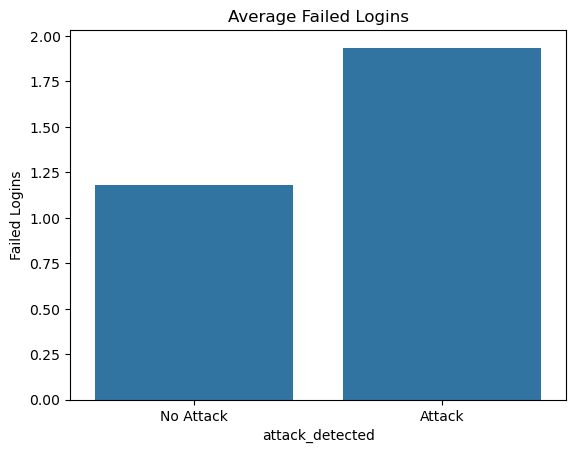

In [32]:
sns.barplot(x='attack_detected',y='failed_logins',data=df, errorbar=None)
plt.xlabel('attack_detected')
plt.xticks([0, 1], ['No Attack', 'Attack'], rotation=0)
plt.ylabel('Failed Logins')
plt.title('Average Failed Logins')
plt.show()

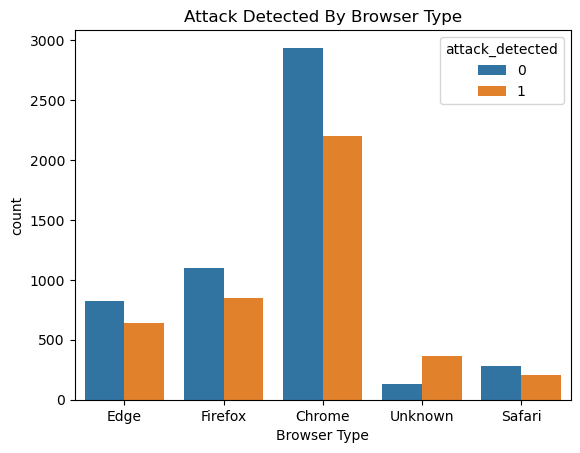

In [34]:
sns.countplot(x='browser_type',data=df,hue='attack_detected')
plt.xlabel('Browser Type')
plt.title('Attack Detected By Browser Type')
plt.show()

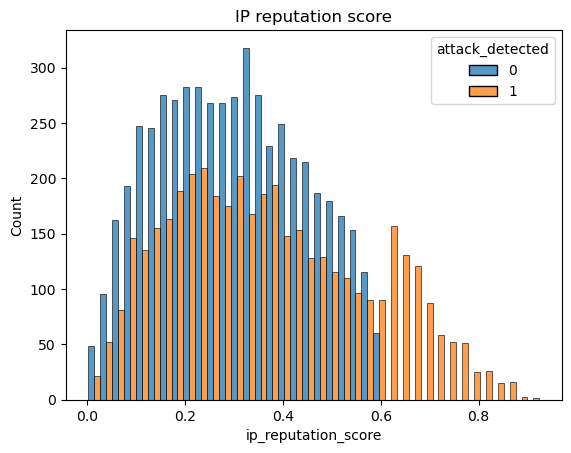

In [36]:
sns.histplot(x='ip_reputation_score',data=df,hue='attack_detected',multiple='dodge')
plt.title('IP reputation score')
plt.show()
#A low IP reputation is often a red flag that an IP is part of malicious activity. 
# Cybersecurity tools use this score to detect, prevent, and respond to cyber attacks.
# Suppose a hacker launches a brute-force attack on multiple servers using an IP address. 
# That IP gets reported to global threat intelligence platforms. 
# Over time, the IP reputation drops. Security systems that rely on IP reputation
# will then automatically reject or throttle traffic from that IP in the future.

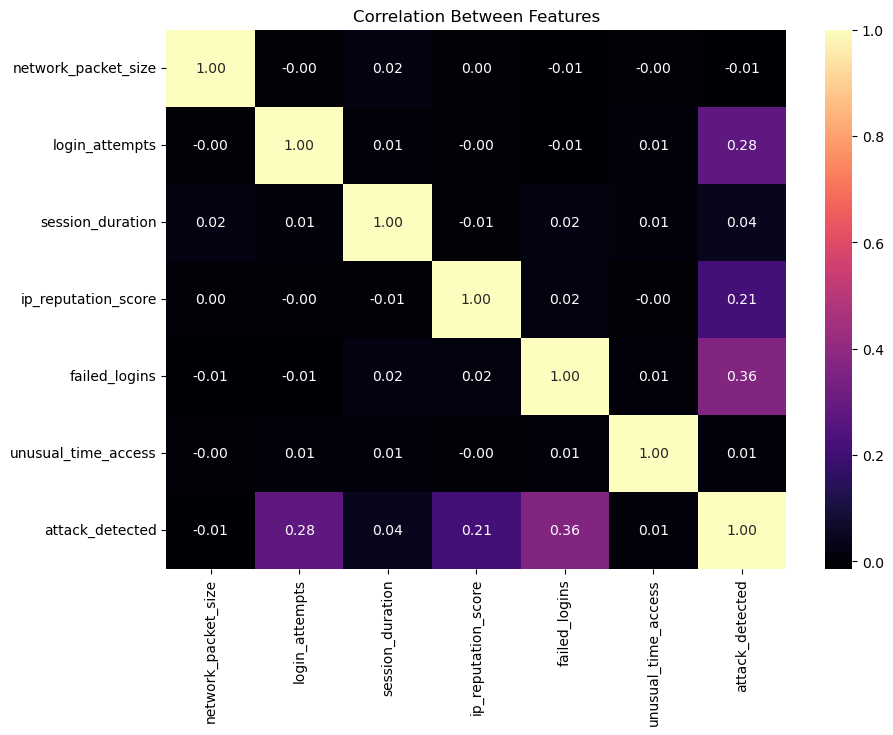

In [38]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='magma', fmt=".2f")
plt.title("Correlation Between Features")
plt.show()

## SPLIT TRAIN AND TEST DATA

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=40,test_size=0.2)

## MODEL CREATION

**RANDOM FOREST CLASSIFICATION**

In [45]:
RF=RandomForestClassifier(n_estimators=1000,class_weight='balanced',n_jobs=-1)
RF.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=1000, n_jobs=-1)

In [47]:
RF_pred = RF.predict(x_test)
RF_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [49]:
print('Score:',RF.score(x_test,y_test))
print("Accuracy:", accuracy_score(y_test, RF_pred))
print("Precision:", precision_score(y_test, RF_pred))
print("Recall:", recall_score(y_test, RF_pred))
print("F1 Score:", f1_score(y_test, RF_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, RF_pred))
print("\nClassification Report:\n", classification_report(y_test, RF_pred))

Score: 0.8867924528301887
Accuracy: 0.8867924528301887
Precision: 0.9968944099378882
Recall: 0.75
F1 Score: 0.856
Confusion Matrix:
 [[1050    2]
 [ 214  642]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91      1052
           1       1.00      0.75      0.86       856

    accuracy                           0.89      1908
   macro avg       0.91      0.87      0.88      1908
weighted avg       0.91      0.89      0.88      1908



[[1050    2]
 [ 214  642]]


Text(0.5, 1.0, 'Random Forest - Confusion Matrix')

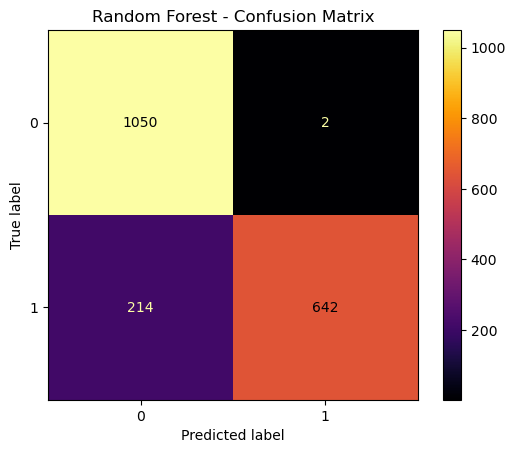

In [51]:
RF_cm = confusion_matrix(y_test, RF_pred)
print(RF_cm)
ConfusionMatrixDisplay.from_predictions(y_test,RF_pred,cmap='inferno')
plt.title('Random Forest - Confusion Matrix')

**XG BOOST CLASSIFICATION**

In [54]:
XG=XGBClassifier(n_estimators=750)
XG.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=750,
              n_jobs=None, num_parallel_tree=None, ...)

In [56]:
XG_pred = XG.predict(x_test)
XG_pred

array([0, 0, 1, ..., 0, 0, 1])

In [58]:
print('Score:',XG.score(x_test,y_test))
print("Accuracy:", accuracy_score(y_test, XG_pred))
print("Precision:", precision_score(y_test, XG_pred))
print("Recall:", recall_score(y_test, XG_pred))
print("F1 Score:", f1_score(y_test, XG_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, XG_pred))
print("\nClassification Report:\n", classification_report(y_test, XG_pred))

Score: 0.8553459119496856
Accuracy: 0.8553459119496856
Precision: 0.8983516483516484
Recall: 0.764018691588785
F1 Score: 0.8257575757575758
Confusion Matrix:
 [[978  74]
 [202 654]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88      1052
           1       0.90      0.76      0.83       856

    accuracy                           0.86      1908
   macro avg       0.86      0.85      0.85      1908
weighted avg       0.86      0.86      0.85      1908



[[978  74]
 [202 654]]


Text(0.5, 1.0, 'XG Boost - Confusion Matrix')

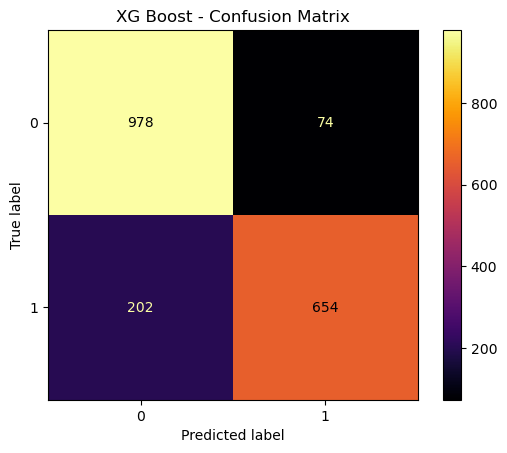

In [60]:
XG_cm = confusion_matrix(y_test, XG_pred)
print(XG_cm)
ConfusionMatrixDisplay.from_predictions(y_test,XG_pred,cmap='inferno')
plt.title('XG Boost - Confusion Matrix')

**SVC**

In [63]:
svc=SVC(C=10000)
svc.fit(x_train,y_train)

SVC(C=10000)

In [65]:
svc_pred = svc.predict(x_test)
svc_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [66]:
print('Score:',svc.score(x_test,y_test))
print("Accuracy:", accuracy_score(y_test, svc_pred))
print("Precision:", precision_score(y_test, svc_pred))
print("Recall:", recall_score(y_test, svc_pred))
print("F1 Score:", f1_score(y_test, svc_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, svc_pred))
print("\nClassification Report:\n", classification_report(y_test, svc_pred))

Score: 0.7044025157232704
Accuracy: 0.7044025157232704
Precision: 0.7044817927170869
Recall: 0.5876168224299065
F1 Score: 0.640764331210191
Confusion Matrix:
 [[841 211]
 [353 503]]

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.80      0.75      1052
           1       0.70      0.59      0.64       856

    accuracy                           0.70      1908
   macro avg       0.70      0.69      0.69      1908
weighted avg       0.70      0.70      0.70      1908



[[841 211]
 [353 503]]


Text(0.5, 1.0, 'SVC - Confusion Matrix')

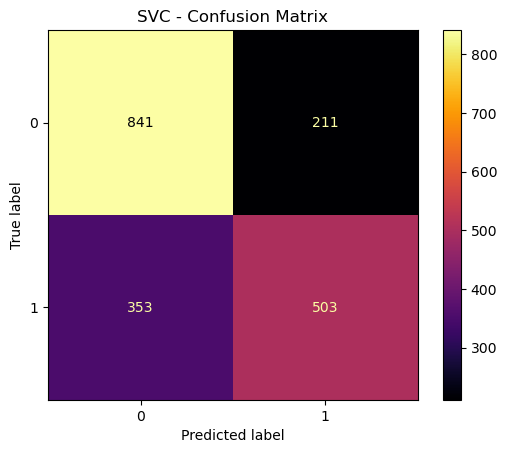

In [68]:
SVC_cm = confusion_matrix(y_test, svc_pred)
print(SVC_cm)
ConfusionMatrixDisplay.from_predictions(y_test,svc_pred,cmap='inferno')
plt.title('SVC - Confusion Matrix')

**Logistic Regression**

In [72]:
logistic=LogisticRegression(max_iter=500,solver='liblinear')
logistic.fit(x_train,y_train)

LogisticRegression(max_iter=500, solver='liblinear')

In [74]:
logistic_pred=logistic.predict(x_test)
logistic_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [76]:
print('Score:',logistic.score(x_test,y_test))
print("Accuracy:", accuracy_score(y_test, logistic_pred))
print("Precision:", precision_score(y_test, logistic_pred))
print("Recall:", recall_score(y_test, logistic_pred))
print("F1 Score:", f1_score(y_test, logistic_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, logistic_pred))
print("\nClassification Report:\n", classification_report(y_test, logistic_pred))

Score: 0.710167714884696
Accuracy: 0.710167714884696
Precision: 0.691046658259773
Recall: 0.6401869158878505
F1 Score: 0.6646452395391146
Confusion Matrix:
 [[807 245]
 [308 548]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.77      0.74      1052
           1       0.69      0.64      0.66       856

    accuracy                           0.71      1908
   macro avg       0.71      0.70      0.70      1908
weighted avg       0.71      0.71      0.71      1908



[[807 245]
 [308 548]]


Text(0.5, 1.0, 'Logistic - Confusion Matrix')

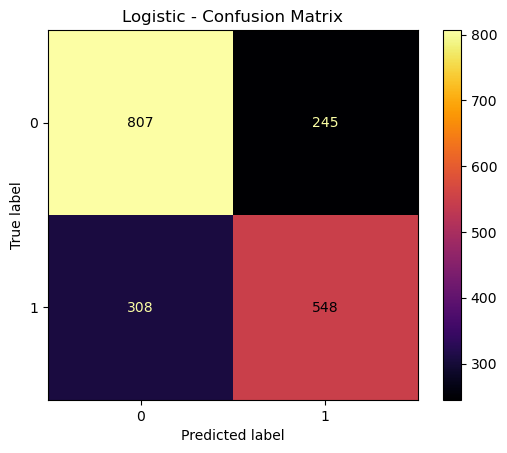

In [78]:
Logistic_cm = confusion_matrix(y_test, logistic_pred)
print(Logistic_cm)
ConfusionMatrixDisplay.from_predictions(y_test,logistic_pred,cmap='inferno')
plt.title('Logistic - Confusion Matrix')

## SAVE MODEL TO FILE

In [81]:
#random forest
#save model
with open('cybersecurity.sav','wb') as cyberfile:
    pickle.dump(RF,cyberfile)
#save encoders
with open('protocol_type.pkl','wb') as a:
    pickle.dump(le_protocol_type,a)
with open('encryption_used.pkl','wb') as b:
    pickle.dump(le_encryption_used,b)
with open('browser_type.pkl','wb') as c:
    pickle.dump(le_browser_type,c)

In [ ]:
#load model
loaded_model = pickle.load(open('cybersecurity.sav','rb'))
#load encoders
le_protocol_type = pickle.load(open('protocol_type.pkl','rb'))
le_encryption_used = pickle.load(open('encryption_used.pkl','rb'))
le_browser_type = pickle.load(open('browser_type.pkl','rb'))

# Get label options for dropdowns
#convert nuerical values into categorical values for future use(choices in dropdown)
protocol_type_options = le_protocol_type.classes_.tolist()
encryption_used_options = le_encryption_used.classes_.tolist()
browser_type_options = le_browser_type.classes_.tolist()

# Define prediction function
def predict_attack_detected(network_packet_size, protocol_input, login_attempts, session_duration, encryption_input, 
                            ip_reputation_score, failed_logins, browser_input, unusual_time_access):
    try:
        # Corrected to use dropdown
        #convert user entered categorical values into numerical
        protocol_type = le_protocol_type.transform([protocol_input])[0]
        encryption_used = le_encryption_used.transform([encryption_input])[0]
        browser_type = le_browser_type.transform([browser_input])[0]
    except ValueError:
        return "Invalid option. Please select from the dropdown."
        
    input_data = np.array([network_packet_size, protocol_type, login_attempts, session_duration, encryption_used, 
                            ip_reputation_score, failed_logins, browser_type, unusual_time_access]).reshape(1, -1)

    prediction = loaded_model.predict(input_data)
    return "Attack detected" if prediction[0] == 1 else "No Attack detected"

# Create Gradio interface
iface = gr.Interface(
    fn=predict_attack_detected,
    inputs=[
        gr.Number(label="Network Packet Size"),
        gr.Dropdown(choices=protocol_type_options, label="Protocol Type"),
        gr.Number(label="Login Attempts"),
        gr.Number(label="Session duration"),
        gr.Radio(choices=encryption_used_options, label="Encryption used"),
        gr.Slider(0, 1, step=0.1, label="IP Reputation Score"),
        gr.Number(label="Failed Logins"),
        gr.Dropdown(choices=browser_type_options, label="Browser Type"),
        gr.Radio(choices=[0,1],label="Unusual Time Access")      
    ],
    outputs="text",
    title="Cyber Attack Prediction",
    description="Enter details to predict cyberattack using a trained ML model."
)

# Launch the interface
iface.launch(debug=True)

        


* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.
